# 🧠 Strategy Notebook: Alpha Models for the End of Days

# 1. 📜 Introduction
## Overview of included strategies, their purpose, and notebook dependencies.

_"Welcome to your last line of defense against financial mediocrity."_

In [12]:
from data_pipeline.data_pipeline import DataPipeline
from alpha_models.mean_reversion import MeanReversionStrategy, run_experiment
import matplotlib.pyplot as plt
from backtesting.backtester import Backtester
import seaborn as sns

# 2. 📈 Load Cleaned Data

In [2]:
pipeline = DataPipeline(ticker="SPY", start_date="2018-01-01", end_date="2024-12-31")
query = "SELECT * FROM price_data WHERE Ticker = 'SPY'"
data = pipeline.query_data(query)

Running query: SELECT * FROM price_data WHERE Ticker = 'SPY'


# 3. 🧪 Strategy Section: Mean Reversion
## Description, Parameters, Signal Generation, Backtest, Plot

In [3]:
strategy = MeanReversionStrategy(window=20, threshold=0.05)
signals = strategy.generate_signals(data)

#cumulative_returns = strategy.backtest(data)
# Run backtest
backtester = Backtester(data, signals)
portfolio = backtester.run_backtest()
backtester.print_performance()

Cumulative Return: -98.83%
Annualized Return: -19.13%
Maximum Drawdown: -99.16%


# 📊 Visual proof that something happened

In [4]:
print("\nSample portfolio values:")
print(portfolio.head())


Sample portfolio values:
0         NaN
1    100000.0
2    100000.0
3    100000.0
4    100000.0
Name: Portfolio_Value, dtype: float64


In [5]:
print("Generated Signals:")
print(signals)

# Print the number of Buy and Sell signals
num_buy = (signals == 1).sum()
num_sell = (signals == -1).sum()
print(f"Number of Buy Signals: {num_buy}")
print(f"Number of Sell Signals: {num_sell}")

Generated Signals:
0       0
1       0
2       0
3       0
4       0
       ..
5275    0
5276    0
5277    0
5278    0
5279    0
Length: 5280, dtype: int64
Number of Buy Signals: 213
Number of Sell Signals: 78


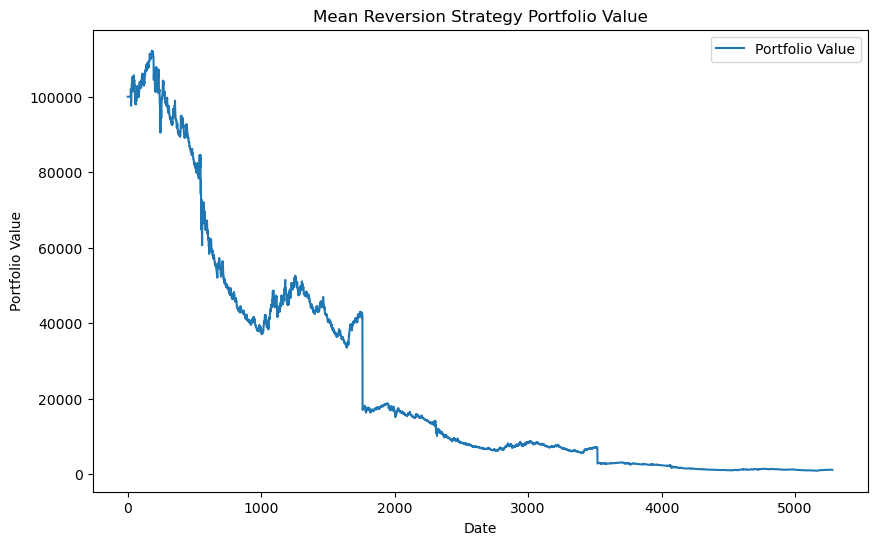

In [6]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(portfolio, label="Portfolio Value")
plt.title("Mean Reversion Strategy Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

# 🧪 Bonus round: Grid search because brute force is a strategy


Experiment Results:
    window  threshold  cumulative_return  annualized_return  volatility  \
0        5       0.03          -0.887888          -0.099171    0.266979   
1        5       0.05          -0.146753          -0.007546    0.262692   
2        5       0.07          -0.886430          -0.098615    0.261573   
3       10       0.03           0.741564           0.026832    0.266978   
4       10       0.05          -0.814649          -0.077294    0.266994   
5       10       0.07          -0.795137          -0.072875    0.264919   
6       15       0.03           1.980064           0.053497    0.266951   
7       15       0.05          -0.602909          -0.043123    0.267002   
8       15       0.07          -0.738648          -0.062037    0.266837   
9       20       0.03           1.215998           0.038707    0.267179   
10      20       0.05          -0.988314          -0.191323    0.266801   
11      20       0.07          -0.797189          -0.073321    0.266833   

   

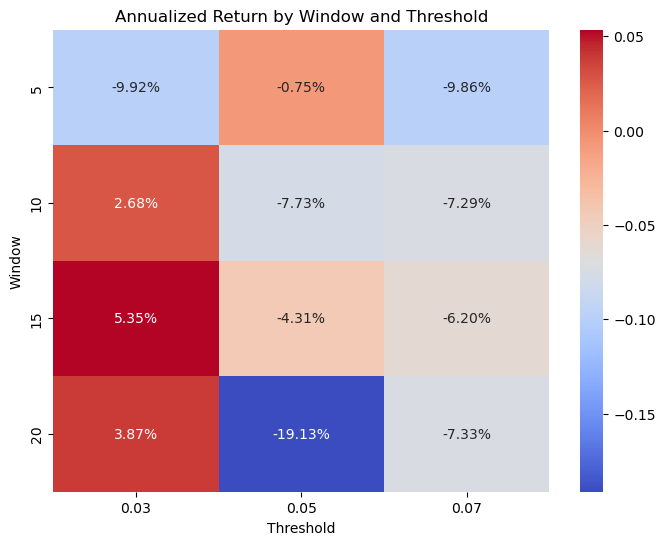

In [13]:
window_values = [5, 10, 15, 20]
threshold_values = [0.03, 0.05, 0.07]
experiment_results = run_experiment(data, window_values, threshold_values)
print("\nExperiment Results:")
print(experiment_results)

heatmap_data = experiment_results.pivot(index="window", columns="threshold", values="annualized_return")
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="coolwarm")
plt.title("Annualized Return by Window and Threshold")
plt.xlabel("Threshold")
plt.ylabel("Window")
plt.show()

# 4. 📚 Comparison & Discussion
# Placeholder for comparing multiple strategies side-by-side

# 5. 🔮 Next Steps
# Discuss improvements, ensemble models, additional signals, etc.